<a href="https://colab.research.google.com/github/hsuanchengsun/Python-Skills/blob/master/Superstore_Projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import useful modules

import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import numpy as np
import time 
import matplotlib.pyplot as plt

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Data and Clean Data

In [ ]:
# Read review data from online folder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/Sample - Superstore_Orders.csv')

In [ ]:
# Show several lines

df.head()

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State/Province,Sub-Category,Discount,Profit,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2019/1/3,US-2019-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,2019/1/7,Standard Class,Texas,Paper,0.2,5.5512,2,16.448
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2019/1/4,US-2019-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2019/1/8,Standard Class,Illinois,Binders,0.8,-5.4870,2,3.540
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2019/1/4,US-2019-112326,60540,Avery 508,Central,Home Office,2019/1/8,Standard Class,Illinois,Labels,0.2,4.2717,3,11.784
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2019/1/4,US-2019-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,2019/1/8,Standard Class,Illinois,Storage,0.2,-64.7748,3,272.736
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2019/1/5,US-2019-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2019/1/12,Standard Class,Pennsylvania,Art,0.2,4.8840,3,19.536


In [ ]:
print('Number of rows: ', len(df))

Number of rows:  10194


In [ ]:
# Test to see if there was any empty reviews in the dataset
df.isnull().values.any()

False

In [ ]:
# Drop duplication

df = df.drop_duplicates()
df.shape

(10192, 19)

In [ ]:
# Check date
df.dtypes

Category           object
City               object
Country/Region     object
Customer Name      object
Manufacturer       object
Order Date         object
Order ID           object
Postal Code        object
Product Name       object
Region             object
Segment            object
Ship Date          object
Ship Mode          object
State/Province     object
Sub-Category       object
Discount          float64
Profit            float64
Quantity            int64
Sales             float64
dtype: object

In [ ]:
# Data description
df.describe(include=['object'])

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State/Province,Sub-Category
count,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192,10192
unique,3,542,2,800,183,1242,5111,654,1849,4,3,1338,4,59,17
top,Office Supplies,New York City,United States,William Brown,Other,2021/9/5,US-2022-100111,10035,Staples,West,Consumer,2020/12/16,Standard Class,California,Binders
freq,6128,915,9993,41,1940,38,14,263,50,3253,5281,38,6118,2001,1548


In [ ]:
df['Product Name'].value_counts()

Staples                                                                      50
Staple envelope                                                              48
Easy-staple paper                                                            46
KI Adjustable-Height Table                                                   20
Avery Non-Stick Binders                                                      20
                                                                             ..
Avery 484                                                                     1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts       1
Xerox 20                                                                      1
Plantronics Single Ear Headset                                                1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Name: Product Name, Length: 1849, dtype: int64

In [ ]:
df['Sub-Category'].value_counts()

Binders        1548
Paper          1384
Furnishings    1008
Phones          903
Storage         856
Art             821
Accessories     775
Chairs          633
Appliances      474
Labels          368
Tables          326
Envelopes       256
Bookcases       232
Fasteners       229
Supplies        192
Machines        117
Copiers          70
Name: Sub-Category, dtype: int64

### Product Demand Projection

In [ ]:
# Since there is less data for each product, I choose to use Sub-Category as the main product category
# I also choose Binders as my example to predict


df_os = df[df['Sub-Category'] == 'Binders'].copy()

In [ ]:
df_os.head()

,Category,City,Country/Region,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State/Province,Sub-Category,Discount,Profit,Quantity,Sales
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2019/1/4,US-2019-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,2019/1/8,Standard Class,Illinois,Binders,0.8,-5.4870,2,3.540
8,Office Supplies,Henderson,United States,Maria Etezadi,Ibico,2019/1/6,US-2019-167199,42420,Ibico Hi-Tech Manual Binding System,South,Home Office,2019/1/10,Standard Class,Kentucky,Binders,0.0,274.4910,2,609.980
15,Office Supplies,Huntsville,United States,Vivek Sundaresam,Acco,2019/1/7,US-2019-105417,77340,Acco Four Pocket Poly Ring Binder with Label H...,Central,Consumer,2019/1/12,Standard Class,Texas,Binders,0.8,-18.2525,7,10.430
24,Office Supplies,Newark,United States,Michael Moore,Avery,2019/1/13,US-2019-118192,43055,Avery Metallic Poly Binders,East,Consumer,2019/1/18,Standard Class,Ohio,Binders,0.7,-2.5212,2,3.438
25,Office Supplies,Bossier City,United States,Chris Selesnick,3-ring staple pack,2019/1/13,US-2019-162775,71111,3-ring staple pack,South,Corporate,2019/1/15,Second Class,Louisiana,Binders,0.0,2.7072,3,5.640


In [ ]:
df_os.describe()

,Discount,Profit,Quantity,Sales
count,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.369057,20.301098,3.921835,133.950182
std,0.311167,303.893602,2.292387,559.368482
min,0.000000,-3701.892800,1.000000,0.556000
25%,0.200000,-6.008400,2.000000,8.251500
50%,0.200000,4.123800,3.000000,18.706500
75%,0.700000,16.001300,5.000000,52.218000
max,0.800000,4946.370000,14.000000,9892.740000


In [ ]:
# I choose sales amount as the product demand target

df_os_sales = df_os[['Order Date', 'Sales']]
df_os_sales

,Order Date,Sales
1,2019/1/4,3.540
8,2019/1/6,609.980
15,2019/1/7,10.430
24,2019/1/13,3.438
25,2019/1/13,5.640
...,...,...
10178,2022/12/29,12.530
10188,2022/12/30,13.904
10189,2022/12/30,52.776
10190,2022/12/30,20.720


In [ ]:
# Set Order Date column to datetime type

df_os_sales['Order Date'] = df_os_sales['Order Date'].apply(pd.to_datetime)

<ipython-input-58-07c85fb00719>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_os_sales['Order Date'] = df_os_sales['Order Date'].apply(pd.to_datetime)


In [ ]:
# Use month average sales as the target

df_os_sales = df_os_sales.set_index('Order Date')
df_os_sales_mean = df_os_sales['Sales'].resample('MS').mean()

In [ ]:
df_os_sales_mean

Order Date
2019-01-01     67.875667
2019-02-01     26.097077
2019-03-01     69.348864
2019-04-01     54.764000
2019-05-01    230.300190
2019-06-01    194.354227
2019-07-01    122.270500
2019-08-01    168.524536
2019-09-01    336.349895
2019-10-01     19.206240
2019-11-01    151.006381
2019-12-01    142.776645
2020-01-01     34.429000
2020-02-01    266.927500
2020-03-01    525.192312
2020-04-01    214.564909
2020-05-01     36.191800
2020-06-01    200.181690
2020-07-01     44.270185
2020-08-01     95.284240
2020-09-01     53.471204
2020-10-01     33.142565
2020-11-01     60.694510
2020-12-01    123.389897
2021-01-01    135.099692
2021-02-01     66.858000
2021-03-01     47.359000
2021-04-01     94.591690
2021-05-01     31.751892
2021-06-01     38.884929
2021-07-01     91.487437
2021-08-01     47.373125
2021-09-01    157.664590
2021-10-01    200.460588
2021-11-01     74.687848
2021-12-01    307.593696
2022-01-01    314.560767
2022-02-01     56.974727
2022-03-01     79.374564
2022-04-01    

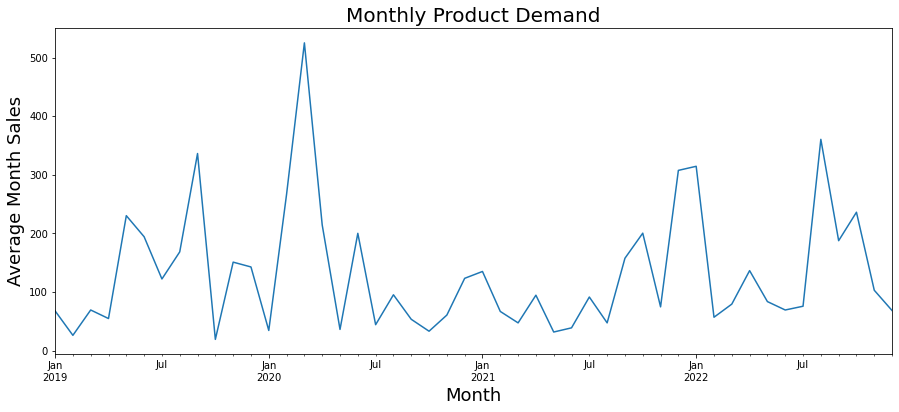

In [ ]:
# Plot the average month sales

df_os_sales_mean.plot(figsize=(15,6))
plt.ylabel("Average Month Sales", fontsize=18)
plt.xlabel("Month", fontsize=18)
plt.title("Monthly Product Demand", fontsize=20)
plt.show()

In [ ]:
# Import modules for seasonal decomposition

import statsmodels.api as sm
from pylab import rcParams

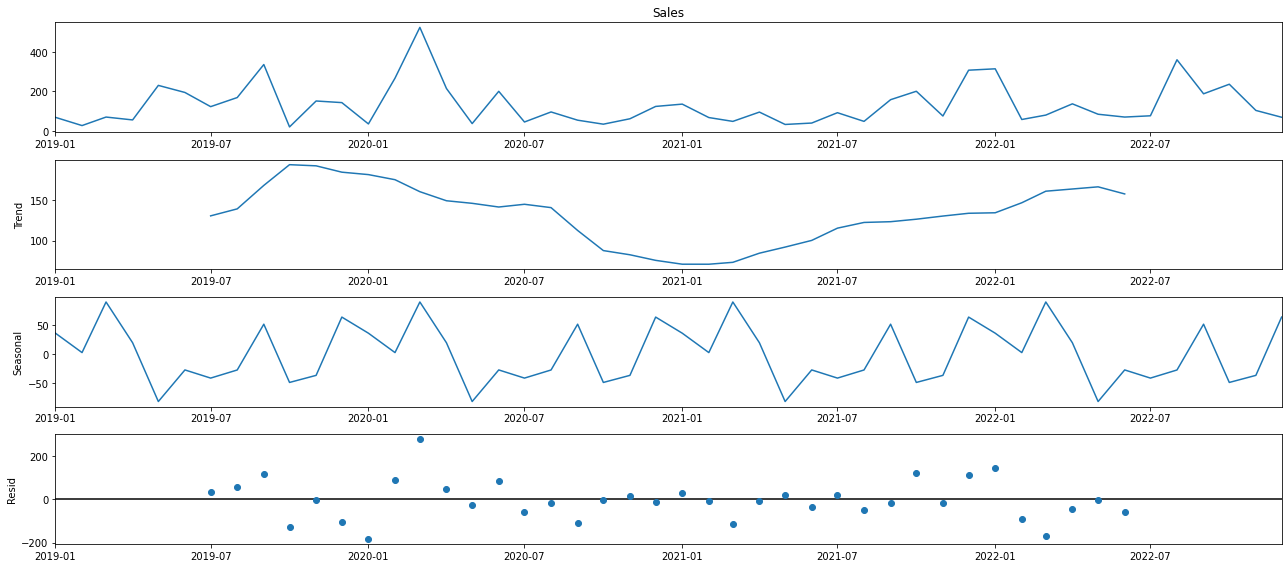

In [ ]:
# Seasonal decomposition

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_os_sales_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Since it has a seasonal trend, I would like to use Seasonal ARIMA model as the projection method
# First, I would like to find the best parameter set
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [ ]:
# Parameter findings
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_os_sales_mean, order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity = False , enforce_invertibility = False)
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 618.2789348227724
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1496.4669790825928
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 461.2237294301668


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 291.20094414628085
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 466.32808865717016
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1490.6658988449005
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 306.7129682243121


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 293.17553309803685
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 587.3027347368597
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2528.63109048418


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 443.4761926999284
ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 280.42219403755877
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 457.4455254639001


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 2576.766270625032
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 305.8564782247263
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 282.0448225665045
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 582.5201483757329
ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1151.114218262704
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 455.48810912805027


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 289.22056340342476
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 445.27748961816985


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1128.9629235114703
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 303.4971927117564
ARIMA(0, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 291.2029189589979
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 556.2770486087772


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2342.3420538895402
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 434.5245939973069
ARIMA(0, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 267.33627096679294
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 436.6958721903628


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 1806.0825279747073
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 299.21338195926194
ARIMA(0, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 269.3361563387489
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 588.5995850570639
ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1679.83903691845
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 458.87659010385187


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 292.62468142458437
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 441.9632350800432


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1195.8062618890551
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 295.2219437350481
ARIMA(1, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 294.59928101859293
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 570.1960450664749


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2554.9899830601253
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 445.379249596224


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 280.76822350493217
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 439.13779890866005


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 1747.587202972551
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 294.0692714478617


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 283.5129039704456
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 579.7082596175038


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1328.1175940367573
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 455.17076624604476
ARIMA(1, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 289.078752433278
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 430.77596628694914


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1294.4801289254258
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 290.2061318936541
ARIMA(1, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 291.0783694289607
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 555.9138865683377


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 520.0113686768218
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 434.34820567532165
ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 268.4870212228747
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 422.4909108799439
ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2213.9591935667463
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 286.86517207924476


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 270.4853555520439


In [ ]:
# The lowest AIC is ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 268.4870212228747
mod = sm.tsa.statespace.SARIMAX(df_os_sales_mean,
                               order = (1,1,1),
                               seasonal_order = (0,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

In [ ]:
results = mod.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1890      0.356      0.532      0.595      -0.508       0.886
ma.L1         -1.0000      0.342     -2.925      0.003      -1.670      -0.330
ma.S.L12      -0.2914      0.323     -0.902      0.367      -0.925       0.342
sigma2       1.34e+04   2.55e-05   5.25e+08      0.000    1.34e+04    1.34e+04


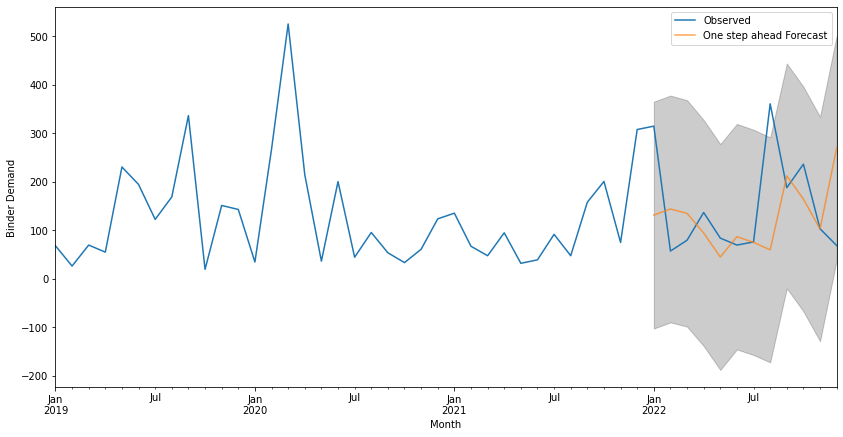

In [ ]:
# Model result
pred = results.get_prediction(start = pd.to_datetime('2022-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = df_os_sales_mean['2019': ].plot(label= 'Observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 0.7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha = 0.2)

ax.set_xlabel('Month')
ax.set_ylabel('Binder Demand')

plt.legend()
plt.show()

In [ ]:
# Error
monthly_forecasted = pred.predicted_mean
monthly_truth = df_os_sales_mean['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 15391.44
The Root Mean Squared Error of our forecasts is 124.06


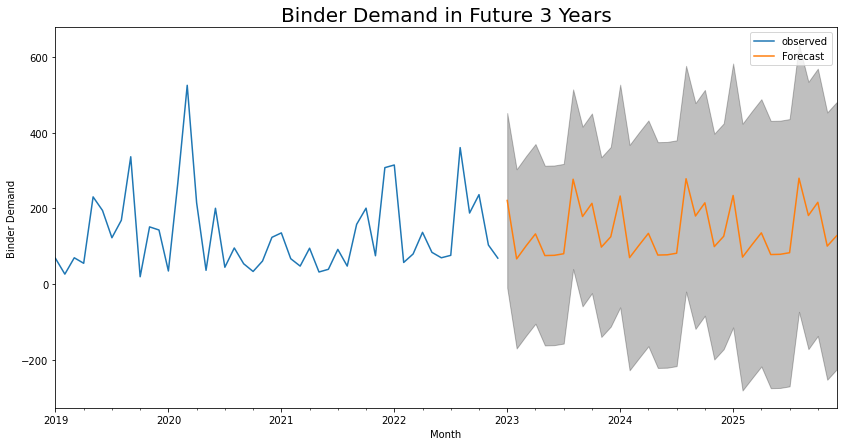

In [ ]:
# 3 years forecast

pred_uc = results.get_forecast(steps = 36)
pred_ci = pred_uc.conf_int()
ax = df_os_sales_mean.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Month')
ax.set_ylabel('Binder Demand')
plt.title("Binder Demand in Future 3 Years", fontsize=20)
plt.legend()
plt.show()

### Unit Price Projection

In [ ]:
# I calculate unit price from sales divided by quantity
# Still use binder as the example

df_os['Unit Price'] = df_os['Sales'] / df_os['Quantity'] 

In [ ]:
df_os_up = df_os[['Order Date', 'Unit Price']]
df_os_up

,Order Date,Unit Price
1,2019/1/4,1.770
8,2019/1/6,304.990
15,2019/1/7,1.490
24,2019/1/13,1.719
25,2019/1/13,1.880
...,...,...
10178,2022/12/29,12.530
10188,2022/12/30,6.952
10189,2022/12/30,17.592
10190,2022/12/30,10.360


In [ ]:
# Set Order Date column to datetime type

df_os_up['Order Date'] = df_os_up['Order Date'].apply(pd.to_datetime)

<ipython-input-74-cee081f96736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_os_up['Order Date'] = df_os_up['Order Date'].apply(pd.to_datetime)


In [ ]:
# Use month median number as the target

df_os_up = df_os_up.set_index('Order Date')
df_os_up_mid = df_os_up['Unit Price'].resample('MS').median()

In [ ]:
df_os_up_mid

Order Date
2019-01-01     3.8690
2019-02-01     4.8200
2019-03-01     6.8490
2019-04-01     5.1260
2019-05-01    11.7000
2019-06-01     7.1820
2019-07-01     3.9200
2019-08-01     6.0800
2019-09-01     4.9220
2019-10-01     5.0600
2019-11-01     4.3500
2019-12-01     5.0640
2020-01-01    10.0700
2020-02-01     3.4920
2020-03-01     9.1320
2020-04-01     6.0900
2020-05-01     6.7000
2020-06-01    12.2080
2020-07-01     3.8560
2020-08-01     5.1040
2020-09-01     4.7720
2020-10-01     4.8640
2020-11-01     4.2240
2020-12-01    12.2240
2021-01-01     8.6240
2021-02-01     4.6400
2021-03-01     5.9600
2021-04-01     5.0600
2021-05-01     3.7590
2021-06-01     4.8685
2021-07-01     4.5460
2021-08-01     3.6360
2021-09-01     5.8400
2021-10-01     8.2700
2021-11-01     4.8595
2021-12-01    11.4160
2022-01-01     4.8145
2022-02-01     3.0480
2022-03-01     6.2300
2022-04-01     4.5060
2022-05-01     6.2310
2022-06-01     5.1800
2022-07-01     5.8240
2022-08-01    11.9360
2022-09-01     4.5780

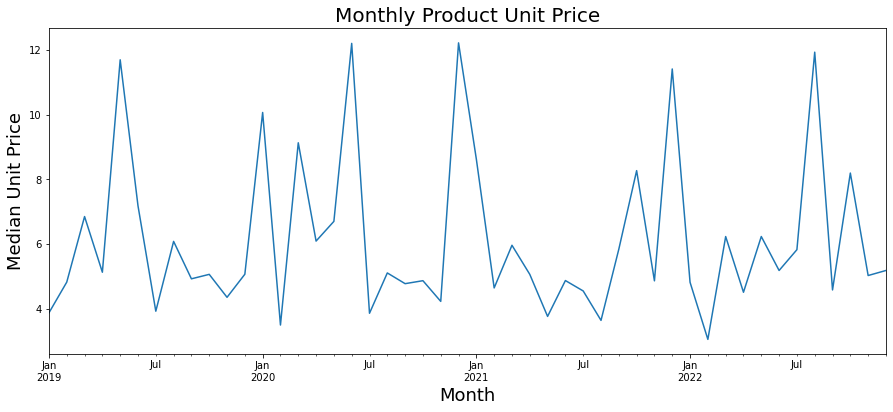

In [ ]:
# Plot the median product unit price

df_os_up_mid.plot(figsize=(15,6))
plt.ylabel("Median Unit Price", fontsize=18)
plt.xlabel("Month", fontsize=18)
plt.title("Monthly Product Unit Price", fontsize=20)
plt.show()

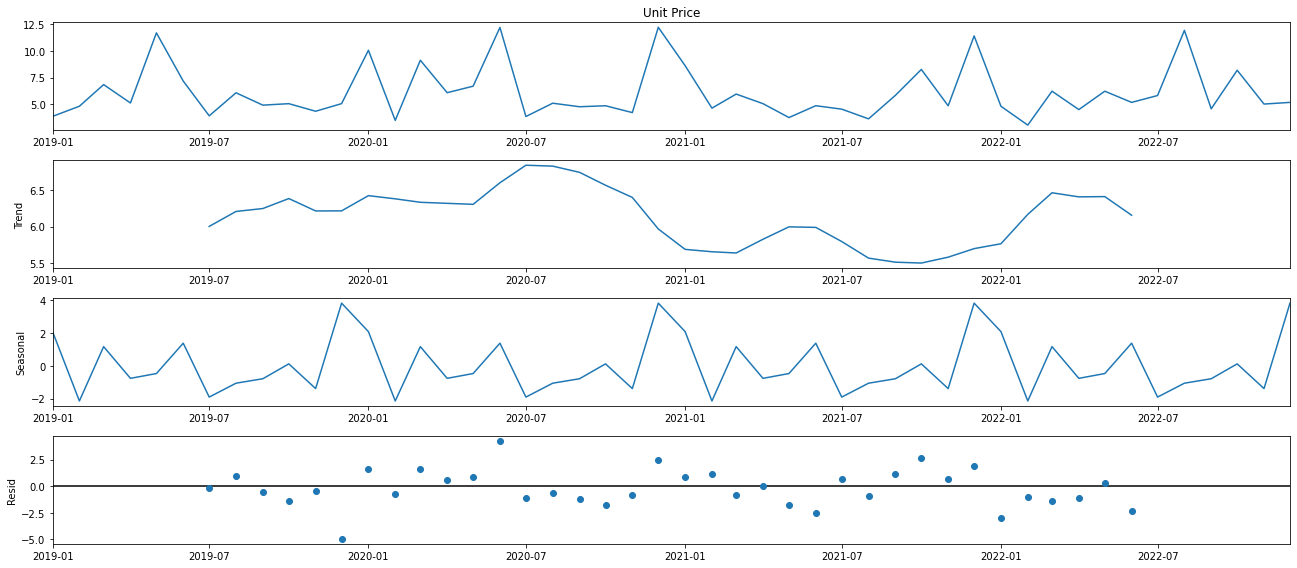

In [ ]:
# Seasonal decomposition

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_os_up_mid, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Parameter findings
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_os_up_mid, order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity = False , enforce_invertibility = False)
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 313.35624392620025
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1609.9004603108272
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 180.75861873815916
ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 118.09341210432032


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 188.86758419292548
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1665.1783065275645
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 124.53257087205169
ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 122.25545364566018


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 283.9025710843891
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 1718.2795961995175
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 178.4032916014973


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 115.61167998251135
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 190.86195309807752


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 1673.9087957507809
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 126.15031234124126
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 119.7065886714227
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 253.93287427618262
ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1334.5348994396313
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 199.59536498577828
ARIMA(0, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 123.64213858728635
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 195.69597101822643


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1499.909352159318
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 130.84495077691696
ARIMA(0, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 128.06641655672558
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 217.35187421855113


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 1349.1910614112717
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 177.93125960654135
ARIMA(0, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 113.10458582578244
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 174.35976846953432


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 1363.9803501183685
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 125.07978999423227
ARIMA(0, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 116.97176188312531
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 256.7828131028693
ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1496.3762955703562
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 182.6027845155786


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 119.50114681887891
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 182.10321372253836


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1450.6486706031417
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 122.08696318587624
ARIMA(1, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 123.85278424657221
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 223.91464366275673


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 1086.7745656631917
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 179.92666501502347
ARIMA(1, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 116.95692969814137
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 175.6284304406781


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 1042.403156040409
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 124.05481291084027
ARIMA(1, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 120.23954726626243
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 238.8742353654518
ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1635.5838642151973
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 189.3441564800422
ARIMA(1, 1, 0) x (0, 1, 1, 12) 12 -- AIC : 122.50810527613642


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 176.19926076202546
ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1655.0099653544457
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 123.77401848330135

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



ARIMA(1, 1, 0) x (1, 1, 1, 12) 12 -- AIC : 125.77213541376123
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 218.55131851973337


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 1269.5058260957355
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 179.92076725016858
ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 114.47808492529711
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 168.85509191948498


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 1288.4545478002383
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 121.80744754288136


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 118.48994960618052


In [ ]:
# The lowest AIC is ARIMA(1, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 114.47808492529711
mod = sm.tsa.statespace.SARIMAX(df_os_up_mid,
                               order = (1,1,1),
                               seasonal_order = (0,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

In [ ]:
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1791      0.497      0.361      0.718      -0.794       1.152
ma.L1         -1.0000   1.61e+04  -6.22e-05      1.000   -3.15e+04    3.15e+04
ma.S.L12      -0.6597      0.766     -0.861      0.389      -2.161       0.841
sigma2         7.8954   1.27e+05   6.22e-05      1.000   -2.49e+05    2.49e+05


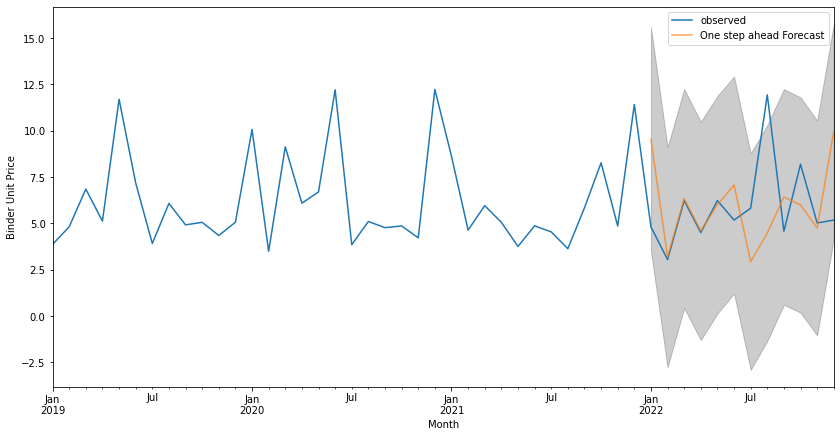

In [ ]:
# Model result
pred = results.get_prediction(start = pd.to_datetime('2022-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = df_os_up_mid['2019': ].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 0.7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color = 'k', alpha = 0.2)

ax.set_xlabel('Month')
ax.set_ylabel('Binder Unit Price')
plt.legend()
plt.show()

In [ ]:
# Error
monthly_forecasted = pred.predicted_mean
monthly_truth = df_os_up_mid['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 10.1
The Root Mean Squared Error of our forecasts is 3.18


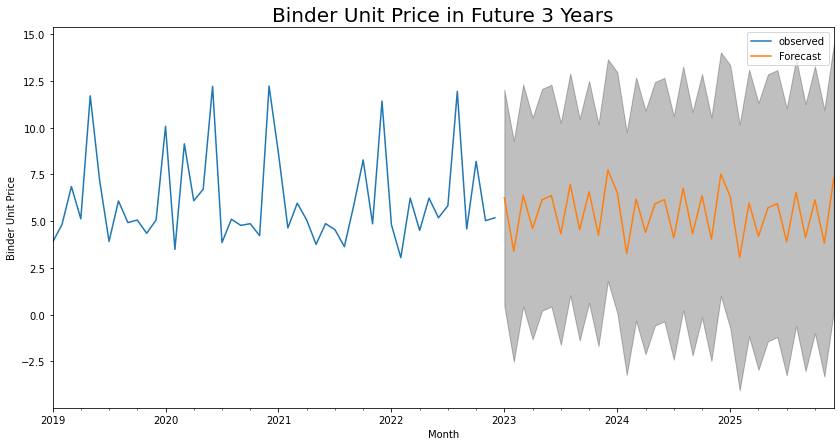

In [ ]:
# 3 years forecast

pred_uc = results.get_forecast(steps = 36)
pred_ci = pred_uc.conf_int()
ax = df_os_up_mid.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Month')
ax.set_ylabel('Binder Unit Price')
plt.title("Binder Unit Price in Future 3 Years", fontsize=20)
plt.legend()
plt.show()